In [1]:
import numpy as np
import pandas as pd
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_equal, assert_almost_equal
from pandas.testing import assert_frame_equal

# (1) Первое обучение

Простое как пробка задание. Обучите классификатор [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) на входных данных с гиперпараметрами:

* `max_depth`=$6$
* `min_samples_split`=$3$
* `min_samples_leaf`=$3$
* `n_estimators`=$100$
* `n_jobs`=$-1$

И верните обученную модель.

Данные в X только численные, в y только 2 значения: 0 и 1. 

# TASK

In [7]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def fit_rf(X: np.ndarray, y:np.ndarray) ->  RandomForestClassifier:
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    pass

In [3]:
######################################################
np.random.seed(1337)
n = 200
a = np.random.normal(loc=0, scale=1, size=(n, 2)) #первый класс
b = np.random.normal(loc=3, scale=2, size=(n, 2)) #второй класс
X_clf = np.vstack([a, b]) #двумерный количественный признак
y_clf = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

model = fit_rf(X_clf, y_clf)
assert model.n_estimators == 100
assert model.max_depth == 6
assert model.min_samples_split == 3
assert model.min_samples_leaf == 3

assert_equal(model.predict(np.array([[0, 0]])), np.array([0.]))
assert_equal(model.predict(np.array([[3, 3]])), np.array([1.]))
######################################################

# (1) Первая классификация

На [гите](https://github.com/samstikhin/ml2021/tree/master/02-IntroML/data) вы можете найти данные для бинарной классификации (`diabetes_train`, `diabetes_test`). 

$Y$ в этих данных выступает столбик `Outcome`, в качаестве $X$ - все остальное. 

Вам необходимо предсказать $y_{test}$ такой, что $accuracy > 0.75$ ([доля правильных ответов](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Вы можете делать что угодно, чтобы получить результат:

* использовать любой классификатор с любыми гиперпараметрами
* как угодно изменять данные 

Вернуть в этом случае нужно не модель, а результат - одномерный массив данных $y_{pred}$ (предсказание $y_{test}$).

P.S. Можете узнать больше о данных по [ссылке](https://www.kaggle.com/uciml/pima-indians-diabetes-database). Мы произвольным образом разбили данные в соотношении 4:1.

# TASK

In [2]:
import numpy as np

def classification(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray) -> np.ndarray:
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    pass

In [ ]:
######################################################
df_train = pd.read_csv('data/diabetes_train.csv')
df_test = pd.read_csv('data/diabetes_test.csv')

X_train = df_train.drop(columns=['Outcome']).values
y_train = df_train['Outcome']

X_test = df_test.values
y_test = pd.read_csv('data/diabetes_answers.csv')['Outcome']

y_pred = classification(X_train, y_train, X_test)

assert sklearn.metrics.accuracy_score(y_test, y_pred) > 0.74
######################################################

# (1) Переобучение

По [гите](https://github.com/samstikhin/ml2021/tree/master/02-IntroML/data) вы можете найти данные для бинарной классификации (`overfit_train`, `overfit_test`). Вам на вход подается тренировачная и тестовая выборки из файла. 

Верните такую обученную модель, которая на тренировачной выборке дает $accuracy > 0.97$, а на тестовом $accuracy < 0.7$.

[$accuracy$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) - доля правильных ответов.

# TASK

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib.pyplot as plt

def overfitting(X_train: np.array, y_train: np.array, X_test: np.array, y_test: np.array):
    clf_knn = KNN(n_neighbors=1) # получаем экземпляр модели
    clf_knn.fit(X_train, y_train) # обучаем модель на данных

    p = clf_knn.predict(X_test)
    s = clf_knn.score(X_test,y_test)
    print(s)
    return clf_knn

In [2]:
######################################################
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

X_train = df_train.drop(columns=['y']).values
y_train = df_train['y']

X_test = df_test.drop(columns=['y']).values
y_test = df_test['y']

model = overfitting(X_train, y_train, X_test, y_test)

y_train_pred = model.predict(X_train)
y_test_pred =  model.predict(X_test)
assert sklearn.metrics.accuracy_score(y_train, y_train_pred) > 0.97, (sklearn.metrics.accuracy_score(y_train, y_train_pred), sklearn.metrics.accuracy_score(y_test, y_test_pred))
assert sklearn.metrics.accuracy_score(y_test, y_test_pred) < 0.7

######################################################

0.6875


In [3]:
y_test

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
155    1.0
156    1.0
157    1.0
158    1.0
159    1.0
Name: y, Length: 160, dtype: float64

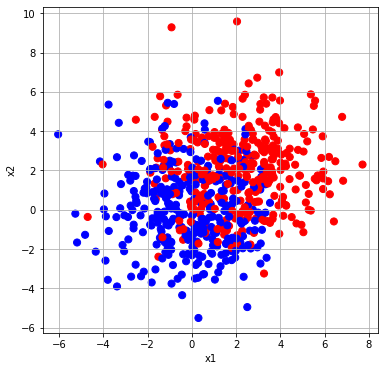

In [75]:
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=50, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [91]:
model = KNN(n_neighbors=1) # получаем экземпляр модели
model.fit(X_train, y_train) # обучаем модель на данных

KNeighborsClassifier(n_neighbors=1)

In [92]:
y_train_pred = model.predict(X_train)
y_test_pred =  model.predict(X_test)

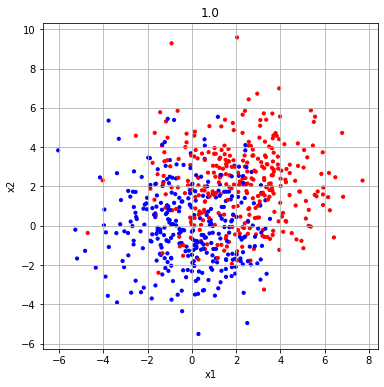

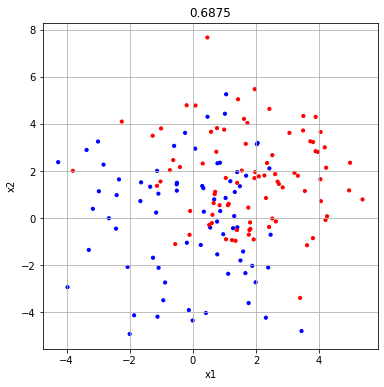

In [93]:
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='bwr', s=10, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(sklearn.metrics.accuracy_score(y_train, y_train_pred))
plt.grid()
plt.figure(figsize=(6, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='bwr', s=10, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(sklearn.metrics.accuracy_score(y_test, y_test_pred))
plt.grid()

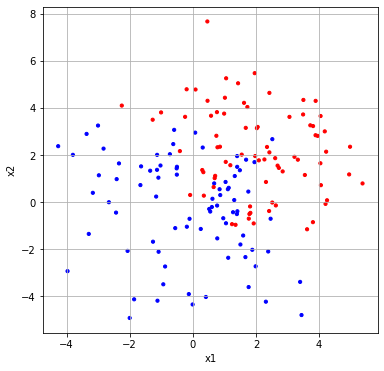

In [52]:
def get_grid(data, border=1., step=.01): #получаем все точки плоскости
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                       np.arange(y_min, y_max, step))


def plot_model(X_train, y_train, clf, title=None, proba=False):
    xx, yy = get_grid(X_train) #получаем все точки плоскости
    plt.figure(figsize=(7, 7))
    # предсказываем значения для каждой точки плоскости
    
    if proba: # нужно ли предсказывать вероятности 
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Отрисовка плоскости
    ax = plt.gca()
    ax.pcolormesh(xx, yy, predicted, cmap='spring')
    
    # Отрисовка точек
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='spring', edgecolors='b')
    colors = ['purple', 'yellow', 'orange']
    patches = []
    for yi in np.unique(y_train):
        patches.append(mpatches.Patch(color=colors[int(yi)], label='$y_{pred}=$'+str(int(yi))))
    ax.legend(handles=patches)
    plt.title(title)
    return clf

In [43]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [47]:
clf_knn = KNN() # получаем экземпляр модели
clf_knn.fit(X_train, y_train) # обучаем модель на данных

KNeighborsClassifier()

In [48]:
clf_knn.predict(np.array([[2, 0], [0, 2]]))

array([1., 1.])

In [49]:
clf_knn.predict_proba(np.array([[2,0],[0,2]]))

array([[0.4, 0.6],
       [0.4, 0.6]])

NameError: name 'mpatches' is not defined

<Figure size 504x504 with 0 Axes>

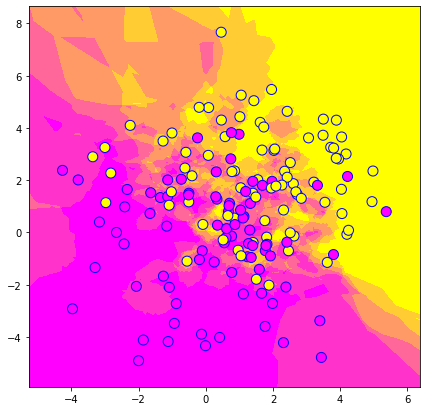

In [65]:
plt.figure(figsize=(7, 7))
plot_model(X_test, y_test, clf_knn, proba=True)

NameError: name 'mpatches' is not defined

<Figure size 504x504 with 0 Axes>

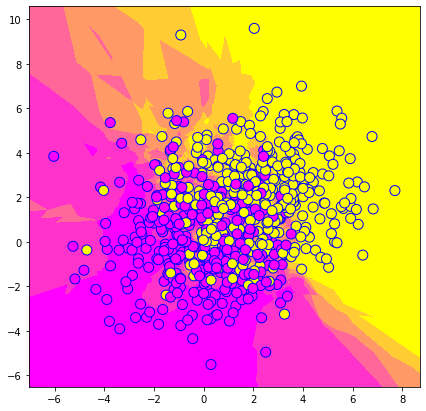

In [66]:
plt.figure(figsize=(7, 7))
plot_model(X_train, y_train, clf_knn, proba=True)

# (2) Мой KNN

Ваша задача реализовать свой простой KNNClassifier для бинарных данных. Вам нужно реализовать 3 метода:

* `init` - начальная инициализация
* `fit` - обучение классификатора
* `predict` - предсказание для новых объектов
* `predict_proba` - предсказание вероятностей новых объектов

У нашего классификатора будет лишь один гиперпараметр - количество соседей $k$. Во избежании тонкостей: $k$ - нечетное.

На вход будет подаваться выборка объектов $X$, у которых ровно 2 числовых признака. $y$ - результат бинарной классификации $0$ или $1$.

Метрика ближайших элементов - Эвклидова.

Напоминание: $y$ - одномерный массив, $X$ - двумерный массив, по $0$-ой оси которой расположены объекты.

### Sample 1
#### Input:
```python
X_train = np.array([[1, 1], [1, -1], [-1,-1], [-1, 1]])
y_train = np.array([1, 1, 0, 0])

model = KNN(k=3).fit(X_train, y_train)
y_pred = model.predict(np.array([[0.5, 0.5], [ -0.5,  -0.5]]))
y_prob = model.predict_proba(np.array([[0.5, 0.5], [-0.5, -0.5]]))
```
#### Output:
```python
y_pred = np.array([1., 0.])
y_prob = np.array([[0.33, 0.667],
                   [0.667, 0.33]])
```

# TASK

In [144]:
import numpy as np
from collections import Counter


class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y): # просто сохраняем обучения по сути нет
        self.X_train = X  # входные данные (тип точки)
        self.y_train = y  # классы входных данных (классы точек)
        return self
    
    def d(self, a, b): 
        return np.sqrt(np.sum((a - b) ** 2))

    def predict(self, X: np.array):
        y_pred = [self.get_neighbour_classes_count(x).most_common(1)[0][0] for x in X]   # мост_коммон возвращает
          # [(class, count)]  следовательно берем [0][0] то есть class
        return np.array(y_pred)
    
    def predict_proba(self, X_test: np.array):
        probs = []
        for x in X_test:
            counter = self.get_neighbour_classes_count(x)
            probs.append([counter[cls] / self.k for cls in range(2)])   # делим колличество соседей одного класса 
              # на колличество соседей всего то есть получем вероятность 
        return probs
    
    def get_neighbour_classes_count(self, x): 
        '''Возвращает Counter({class1: count1, class2: count2}) отображение классов в их колличество'''
        distances = [self.d(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[:self.k]  # сортируем по дистанции НО находим индексы точек
        k_neighbor_classes = [self.y_train[i] for i in k_idx]  # по индексам находим классы
        return Counter(k_neighbor_classes)   # посчитываем точки того и того класса
        

## TESTS


In [136]:
m = KNN(3)
X_clf = np.array([[1, 1], [1, -1], [-1,-1], [-1, 1]])
y_clf = np.array([1, 1, 0, 0])
m.fit(X_clf, y_clf)


In [137]:
m.predict(X_clf)

array([1, 1, 0, 0])

In [138]:
m.predict_proba(np.array([[0.5, 0.5], [-0.5, -0.5]]))

[[0.3333333333333333, 0.6666666666666666],
 [0.6666666666666666, 0.3333333333333333]]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from numpy.testing import assert_almost_equal,assert_equal, assert_array_almost_equal
######################################################
X_clf = np.array([[1, 1], [1, -1], [-1,-1], [-1, 1]])
y_clf = np.array([1, 1, 0, 0])



model = KNN(k=3).fit(X_clf, y_clf)

assert_equal(model.predict(np.array([[-0.5, -0.5]])), np.array([0.]))
assert_equal(model.predict(np.array([[ 0.5,  0.5]])), np.array([1.]))
assert_almost_equal(model.predict_proba(np.array([[0.5, 0.5], [-0.5, -0.5]])), 
                    np.array([[0.33, 0.667],
                              [0.667, 0.33]]), 
                    decimal=2)
######################################################

NameError: name 'KNN' is not defined

In [140]:

np.random.seed(1337)
n = 100
a = np.random.normal(loc=0, scale=1, size=(n, 2)) #первый класс
b = np.random.normal(loc=3, scale=2, size=(n, 2)) #второй класс
X = np.vstack([a, b]) #двумерный количественный признак
y = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1645)

model = KNN(k=3).fit(X_train, y_train)
model_real = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)


assert_array_almost_equal(model.predict(X_test), model_real.predict(X_test))
assert_array_almost_equal(model.predict_proba(X_test), model_real.predict_proba(X_test))
######################################################

In [141]:

np.random.seed(37)
n = 1000
a = np.random.normal(loc=0, scale=1, size=(n, 2)) #первый класс
b = np.random.normal(loc=1, scale=1, size=(n, 2)) #второй класс
X = np.vstack([a, b]) #двумерный количественный признак
y = np.hstack([np.zeros(n), np.ones(n)]) #бинарный признак

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1645)

model = KNN(k=5).fit(X_train, y_train)
model_real = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)


assert_array_almost_equal(model.predict(X_test), model_real.predict(X_test))
assert_array_almost_equal(model.predict_proba(X_test), model_real.predict_proba(X_test))
######################################################

In [ ]:
X_train_simple = X_clf
y_train_simple = y_clf
X_test_simple = X_train_simple
y_test_simple = y_train_simple

model = KNN(k=3).fit(X_train_simple, y_train_simple)
model_real = KNeighborsClassifier(n_neighbors=3).fit(X_train_simple, y_train_simple)

y_pred_simple = model.predict(X_test_simple)
y_pred_real_simple = model_real.predict(X_test_simple)

Xy_plot(X_test_simple, y_pred_simple)
Xy_plot(X_test_simple, y_pred_real_simple)

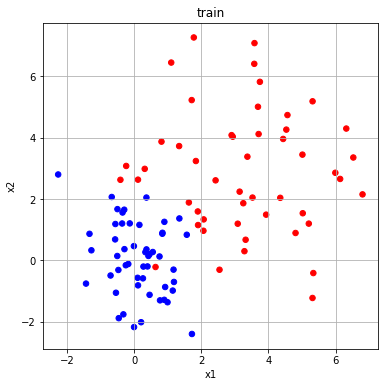

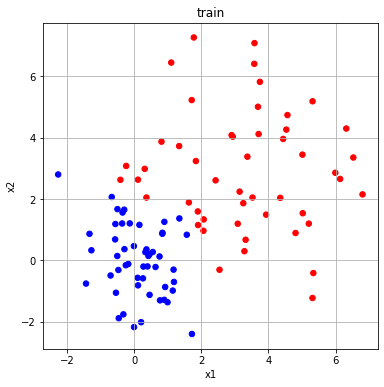

In [297]:
model = KNN(k=3).fit(X_train, y_train)
model_real = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_real = model_real.predict(X_test)

Xy_plot(X_test, y_pred)
Xy_plot(X_test, y_pred_real)

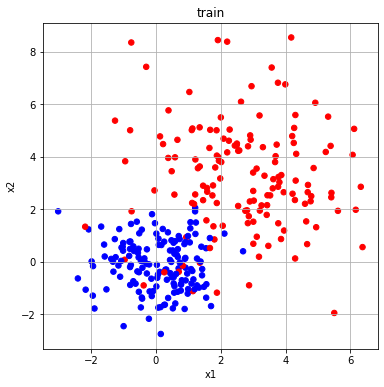

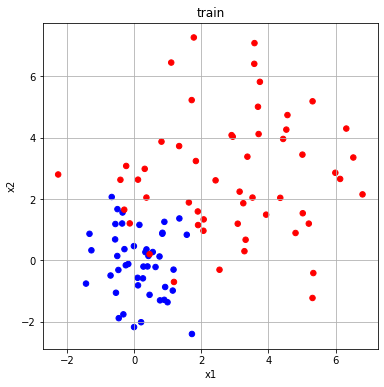

In [296]:
Xy_plot(X_train, y_train)
Xy_plot(X_test, y_test)

In [118]:
def Xy_plot(X_train, y_train):
    plt.figure(figsize=(6, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=30, alpha=1)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('train')
    plt.grid()

# (2) Моя Регрессия

Теперь вам предстоит реализовать свою простейшую линейную регрессию по функкционалу $MSE$.

Линейная регрессия выглядит следующим образом:
$$a(x) = w_1x + w_0$$

Необходимо найти такие $w_0$ и $w_1$, при которых минимизируется значение

$$MSE(X,Y) = \frac{1}{n}\sum_{i=1}^{n}(a(x_i) - y_i)^2$$

Выведите формулы для $w_0$ и $w_1$ аналитически и реализуйте следующие методы класса 

* `init` - начальная инициализация
* `fit` - обучение классификатора
* `predict` - предсказание для новых объектов

После обучения у модели должен присутствовать атрибут `model.coef_` из которого можно получить коэффициенты регрессии в порядке: $w_1$, $w_0$.

Гиперпараметры отсутствуют.

На вход будут подаваться два массива $X\in \mathbb{R}^{n}$ и $Y \in \mathbb{R}^{n}$.

Метрика - Евклидова.

### Sample 1
#### Input:
```python
X_train = np.array([[1], [2]])
y_train = np.array([1, 2])

model = LinReg().fit(X_train, y_train)
y_pred = model.predict(np.array([[3],[4]]))

```
#### Output:
```python
y_pred = np.array([3, 4])
model.coef_ = np.array([1., 0.])
```

# TASK

In [436]:
import numpy as np
from numpy import dot
from numpy.linalg import pinv

class LinReg():
    def __init__(self):
        self.theta: np.array
        self.coef_: np.array
        
    def _cap(self, a: np.array):
        return np.vstack((np.ones(a.shape), a))

    def fit(self, X_train: np.array, y_train: np.array):
        X_train = self._cap(X_train.T)
        y_train = y_train[np.newaxis].T
        self.theta = dot(
            pinv(dot(X_train, X_train.T)).T, 
            dot(X_train, y_train)
        )
        self.coef_ = self.theta.T[0][::-1]
        return self

    def predict(self, X_test: np.array):
        X_test = self._cap(X_test.T)
        y_pred, = dot(X_test.T, self.theta).T
        return y_pred
    

In [437]:
######################################################
X_reg = np.array([[1], [2]])
y_reg = np.array([1, 2])

model = LinReg().fit(X_reg, y_reg)
assert_array_almost_equal(model.predict(np.array([[3],[4]])), np.array([3, 4]), decimal=2)

assert_array_almost_equal(model.predict(np.array([[0]])), np.array([0]), decimal=2)

assert_array_almost_equal(model.coef_, np.array([1., 0.]), decimal=2)
######################################################
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X_reg, y_reg = make_regression(n_samples=200, n_features=1, n_targets=1)

model = LinearRegression().fit(X_reg, y_reg)
model2 = LinReg().fit(X_reg, y_reg)

coef_real = np.array([model.coef_[0], model.predict(np.array([[0]]))[0]])
coef_my = model2.coef_

assert_array_almost_equal(coef_my, coef_real, decimal=3)
######################################################
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X_reg, y_reg = make_regression(n_samples=1200, n_features=1, n_targets=1)

model = LinearRegression().fit(X_reg, y_reg)
model2 = LinReg().fit(X_reg, y_reg)

coef_real = np.array([model.coef_[0], model.predict(np.array([[0]]))[0]])
coef_my = model2.coef_

assert_array_almost_equal(coef_my, coef_real, decimal=3)
######################################################

# (2) Наивный (зато свой) Байес

Требуется написать свой классификтор, на основе наивного баеса. Необходимо реализовать аналог `MultinomialNB`. 

$$y_{test} = argmax_{c}\ln{P(y_{test}=c)} + \sum_{j=1}^{m}\ln{(P(f_j|y_{test}=c) + \alpha)}, ~~~ c\in\{0,1\}$$

На вход подаются численные категориальные признаки. Классы: $0$ и $1$. У классификатора будет единственный параметр - $alpha$.

### Sample 1:
#### Input:
```python
X_clf = np.array([[1, 1], [1, -1], [-1,-1], [-1, 1]])
y_clf = np.array([1, 1, 0, 0])

model = MyNaiveBayes(alpha=1).fit(X_clf, y_clf)

y_pred = model.predict(np.array([[1, 2], [-1, -2]]))
```
#### Output:
```python
y_pred = [1, 0]
```

# TASK

In [1]:
from collections import defaultdict
from math import log

class MyNaiveBayes():
    def __init__(self, alpha=1):
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        assert X.ndim == 2
        assert y.ndim == 1
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        return self
            
    def predict(self, X: np.ndarray):
        assert X.ndim == 2
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass

NameError: name 'np' is not defined

In [130]:
import numpy as np
from collections import Counter
from math import log
import itertools


class MyNaiveBayes():
    def __init__(self, alpha=1):
        self.cls: Counter
        self.cat: Counter
        self.a = alpha

    def fit(self, X, y):
        cls = Counter(y)
        cat = Counter(itertools.chain(*[[(cai, cl) for cai in ca] for ca, cl in zip(X, y)]))
        
        for k in cls:
            cls[k] /= len(X)
        for f, c in cat:
            cat[(f, c)] /= cls[c]
            
        self.cls = cls
        self.cat = cat
        return self

    def predict(self, X: np.ndarray):
        return [
            max(
                self.cls.keys(),
                key=lambda c: self.prob(X[i], c)
            ) for i in range(len(X))
        ]

    def prob(self, X: np.ndarray, cl):
        freq = log(self.cls[cl])
        for cat in X:
            if not (p := self.cat.get((cat, cl))):
                p = self.a
            freq += log(p)
        return freq



In [131]:
######################################################
X_clf = np.array([[1, 1], [1, -1], [-1,-1], [-1, 1]])
y_clf = np.array([1, 1, 0, 0])

model = MyNaiveBayes(alpha=1).fit(X_clf, y_clf)

assert_equal(model.predict(np.array([[1, 2], [-1, -2]])), np.array([1, 0]))
######################################################
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import MultinomialNB

random_state = 1448
X, y = make_classification(n_samples=500, n_features=4, n_informative=2,
                           scale=5, random_state=random_state)

X = X.astype(np.int) 
X += np.abs(np.min(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=random_state,
                                                    stratify=y)

clf = MyNaiveBayes().fit(X_train, y_train)
assert accuracy_score(y_test, clf.predict(X_test)) > 0.9
######################################################

# SLIDE (1) Злобные твиты

Наивный Байес очень хорошо подходит для Анализа тональности текста. То есть определить несет текст позитивный или негативный вайб :) 

В данной задаче вам даны [твиты про разные авиакомпании](https://github.com/samstikhin/ml2021/tree/master/02-IntroML/data) (`tweets_train`, `tweets_test`). Требуется построить классификтор, который бы определял имеет ли твит положительную или негативную окраску. Напишите функцию `predict`, который возвращает массив, где 1 - это позитивный, 0 - негативный. 

В данной задаче вам понадобятся `TweetTokenizer` и `CountVectorizer`. 

* `TweetTokenizer` и любой tokenizer самостоятельно разбивает строку на слова как-то их модифицировав.
* `CountVectorizer` превращает предложение в вектор чисел основываясь на их частоте, используя токенайзер.

Задача делится на 2 пункта: 

* Preprocessing: переведите все слова в нижний регистр, токенизируйте слова с помощью `TweetTokenizer`, а дальше опять соберите в предложение. Проделайте это и в $X_{train}$ и $X_{test}$
* Predict: переведите предложения в вектора количеств с помощь `CountVectorizer`. Обучите модель на данных и предскажите ответ.

Чтобы получить баллы надо побить accuracy = 0.91 на скрытых данных.


P.S Можете посмотреть топ слов, которые с наибольшей вероятностью относятся к позитивным и негативным классам. 

P.P.S. Если ничего не понятно: можете изучить различные kernel на [kaggle](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

# TASK

In [98]:
from nltk.tokenize import WordPunctTokenizer, TweetTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

def exclude(df):
    idx = df[df['airline_sentiment'] == 'neutral'].index
    df.drop(idx, inplace = True)
    df = df.reset_index(drop=True)
    return df

    

def predict(df_train: pd.DataFrame, df_test: pd.DataFrame):
    df_train = df_train.copy()
    df_test = df_test.copy()
    
    ttk = TweetTokenizer(
        strip_handles=True, 
        reduce_len=True
    )
    wtk = WordPunctTokenizer()
    cvr = CountVectorizer(
#         lowercase=True,
        tokenizer=lambda x:x,
        preprocessor=lambda x:x,
    )

    def tokenize(x):
        t = ttk.tokenize(x)
    rt_txt = df_train['text'].apply(ttk.tokenize)
    X_train = cvr.fit_transform(rt_txt)
    
    ts_txt = df_test['text'].apply(ttk.tokenize)
    X_test = cvr.transform(ts_txt)
    
    y_train = df_train['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
    
    
    model = MultinomialNB(alpha=0.5, fit_prior=True)
    model.fit(X_train, y_train)

    return model.predict(X_test) 

In [99]:
######################################################
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# df_train = pd.read_csv('data/tweets_train.csv')
# df_test = pd.read_csv('data/tweets_test.csv')

df = pd.read_csv('data/Tweets.csv')
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]



In [100]:

y_test = ((df_test['airline_sentiment'] == 'positive').astype(np.int))
X_test = df_test.drop(columns='airline_sentiment')

acc = accuracy_score(y_test, predict(df_train, df_test))
assert acc > 0.88 , acc
assert acc > 0.91 , acc
######################################################

AssertionError: 0.8918178705922629

In [140]:
df_train.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [155]:
tknzr = TweetTokenizer()
tk1 = WordPunctTokenizer()
df = df_train.copy()

df['t1'] = df['text'].apply(lambda x: tk1.tokenize(x))
df['t2'] = df['text'].apply(lambda x: tknzr.tokenize(x))

In [157]:
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,t1,t2
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),"[@, virginamerica, what, @, dhepburn, said, .]","[@VirginAmerica, What, @dhepburn, said, .]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[@, virginamerica, plus, you, ', ve, added, co...","[@VirginAmerica, plus, you've, added, commerci..."
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[@, virginamerica, i, didn, ', t, today, ..., ...","[@VirginAmerica, I, didn't, today, ..., Must, ..."
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[@, virginamerica, it, ', s, really, aggressiv...","[@VirginAmerica, it's, really, aggressive, to,..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[@, virginamerica, and, it, ', s, a, really, b...","[@VirginAmerica, and, it's, a, really, big, ba..."


In [332]:
df[df['airline_sentiment'] != 'neutral']

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14633,569587705937600512,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN


In [166]:
ttk = TweetTokenizer(strip_handles=True, reduce_len=True)
wtk = WordPunctTokenizer()
cvr = CountVectorizer()

def tok(x):
    x = x.lower()
    t = ttk.tokenize(x)
    return ' '.join(t)
tr_txt = df_train['text'].apply(tok)
ts_txt = df_test['text'].apply(tok)
txt = tr_txt.append(ts_txt)


In [171]:

cvr.fit_transform(txt)
sent = df_train['airline_sentiment'].apply(lambda x: 0 if x == 'negative' else 1)
    
sent

0        1
1        1
2        1
3        0
4        0
        ..
14633    0
14634    0
14635    1
14637    1
14639    1
Name: airline_sentiment, Length: 11758, dtype: int64

In [173]:
tr_txt

0                                              what said .
1        plus you've added commercials to the experienc...
2        i didn't today ... must mean i need to take an...
3        it's really aggressive to blast obnoxious " en...
4                 and it's a really big bad thing about it
                               ...                        
14633    my flight was cancelled flightled , leaving to...
14634                       right on cue with the delays 👌
14635    thank you we got on a different flight to chic...
14637      please bring american airlines to #blackberry10
14639    we have 8 ppl so we need 2 know how many seats...
Name: text, Length: 11758, dtype: object

In [313]:
cl = cvr.transform(tr_txt)
i = 0
for c in cl:
    s = [a for a in c.toarray()]
    print(''.join(map(str, s[0])))
    print()
    if i < 2:
        i+=1
    else:
        break

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [291]:
model = MultinomialNB()

In [182]:
model.fit(cl, sent)

MultinomialNB()

IndexError: row index (14634) out of range